<a href="https://colab.research.google.com/github/Gustavo-Ros/Simulacion-1/blob/main/Montecarlo_Acierto_Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np                        #Se cargan las librerías
import random as rnd
import matplotlib.pyplot as plt

In [2]:
def grafica (u1,u2,muestra):              #Esta función grafica la corrdenada en el plano
  if muestra==1:
    plt.scatter(u1,u2,color="red")        #Grafica un punto rojo si está dentro del círculo
  else:
    plt.scatter(u1,u2,color="blue")       #Grafica un punto rojo si está dentro del círculo
  return

In [32]:
def muestra(c):                          #Esta función devuelve 1 si la coordenada está dentro del cuarto de círculo y 0 si no.
  n=0
  u1=rnd.random()                        #Coordenada del eje X
  u2=rnd.random()                        #Coordenada del eje Y
  if u2 <= np.sqrt(np.arctan(u1)):       #Condición de la muestra
        n+=1                             #Número de éxito +1
  grafica(u1,u2,n)
  return n

In [28]:
def prob_iter(N):
  prob=[]
  iter=0                                    #No. de itercaiones
  for i in range(N):
    iter+=muestra(np.sqrt(np.arctan(1)))
    prob.append(iter/(i+1))                #Guarda en una lista la probabilidad
  #print((np.sqrt(np.arctan(1)))*iter/N)                          #Multiplica el último resultado de la probabilidad x 4 par obtener el valor de pi
  return np.mean(prob)

In [15]:
def prob_iter_graf(N):                           #Grafica solo 1 experimento de Montecarlo
  prob=[]
  iter=0                                         #No. de itercaiones
  X=np.linspace(0,1,100)
  plt.plot(X,np.sqrt(np.arctan(X)))              #Grafica el cuarto de círculo
  for i in range(N):
    iter+=muestra(np.sqrt(np.arctan(1)))
    prob.append(iter/(i+1))                      #Guarda en una lista la probabilidad
  print(np.sqrt(np.arctan(1))*iter/N)                                #Multiplica el último resultado de la probabilidad x 4 par obtener el valor de pi
  return prob

0.556550509184332


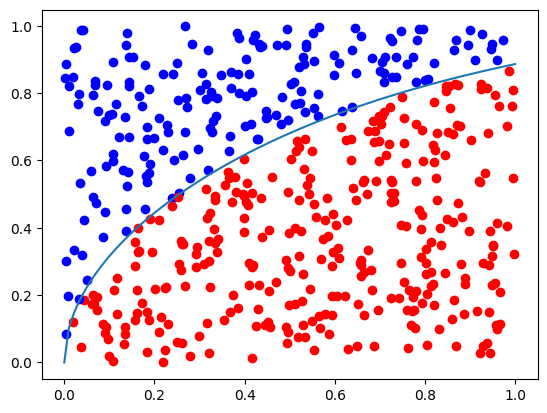

In [33]:
exp=prob_iter_graf(500)


In [18]:
def simulacion(M):          #Esta función es para realizar la simulación mediante varias corridas del experimento
  r=[]
  for i in range(M):
    R=prob_iter(50)        #Si la muestra en el experimento es chica, el número de corridas puede ser alto y viceversa
    r.append(R)
  return r

(array([  2.,   1.,   0.,   4.,   0.,   6.,   0.,  11.,   0.,  24.,   0.,
         28.,   0.,  53.,   0.,  60.,   0.,  80.,   0., 100., 121.,   0.,
        122.,   0., 110.,   0.,  89.,   0.,  80.,   0.,  45.,   0.,  27.,
          0.,  22.,   0.,   8.,   0.,   5.,   2.]),
 array([0.4   , 0.4105, 0.421 , 0.4315, 0.442 , 0.4525, 0.463 , 0.4735,
        0.484 , 0.4945, 0.505 , 0.5155, 0.526 , 0.5365, 0.547 , 0.5575,
        0.568 , 0.5785, 0.589 , 0.5995, 0.61  , 0.6205, 0.631 , 0.6415,
        0.652 , 0.6625, 0.673 , 0.6835, 0.694 , 0.7045, 0.715 , 0.7255,
        0.736 , 0.7465, 0.757 , 0.7675, 0.778 , 0.7885, 0.799 , 0.8095,
        0.82  ]),
 <BarContainer object of 40 artists>)

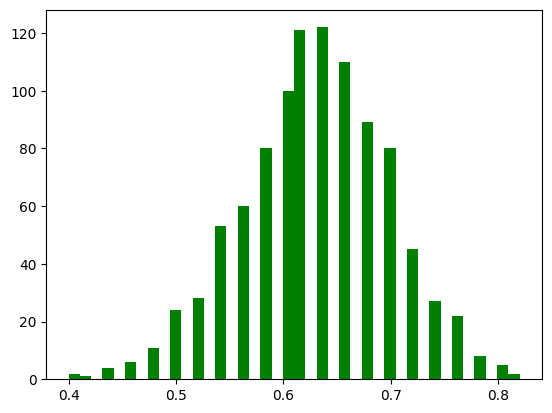

In [23]:
S=simulacion(1000)         #Se simula el experimetno mediante n corridas
plt.hist(S,bins=40,color="green")    #Grafica el histograma de las probabilidades calculas

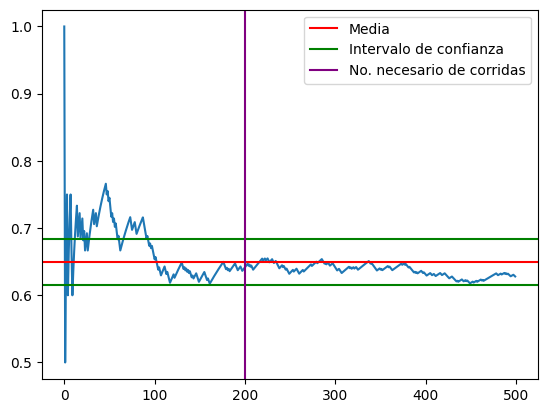

In [34]:
media=np.mean(exp)                                                     #Calcula la media de las probabilidades guardadas en la lista
var=np.std(exp)                                                        #Calcula la varianza de las probabilidades guardadas en la lista
plt.plot(exp)                                                          #Grafica las probabilidades gurdadas, se puede apreciar el estado transitorio y el estable
plt.axhline(media, color="red", label="Media")                         #Grafica la media calculada
plt.axhline(media+var,color="green", label="Intervalo de confianza")
plt.axhline( media-var, color="green")                                  #Crea un intervalo de confianza utilizando la media y varianza
plt.axvline(200, color="purple", label="No. necesario de corridas")     #A partir de 500 vueltas, la probabilidad comienza a estabilizarse
plt.legend()